In [ ]:
# import requests
# import pandas as pd

# url = "https://earthquake.usgs.gov/fdsnws/event/1/query"

# params = {
#     "format": "geojson",
#     "starttime": "2013-01-01",
#     "endtime": "2024-10-28",
#     "minmagnitude": 0,
#     "maxmagnitude": 10,
#     "minlatitude": 24.0,
#     "maxlatitude": 45.5,
#     "minlongitude": 122.0,
#     "maxlongitude": 153.0
# }


# response = requests.get(url, params=params)

# if response.status_code == 200:

#     data = response.json()

#     earthquake = pd.json_normalize(data['features'])


#     earthquake = earthquake[['properties.time', 'properties.place', 'properties.mag', 'geometry.coordinates']]
#     earthquake['properties.time'] = pd.to_datetime(earthquake['properties.time'], unit='ms')


#     # earthquake.to_csv("earthquake.csv", index=False)

# else:
#     print("요청 실패, 상태 코드:", response.status_code)
#     print("오류 메시지:", response.text)


In [ ]:
earthquake_data = earthquake.copy()

In [ ]:
len(earthquake_data)

13677

In [ ]:
earthquake_data.columns = ['date', 'location', 'magnitude', 'coordinates']
# earthquake_data = earthquake_data.set_index('date')

In [ ]:
earthquake_data = earthquake_data.loc[earthquake_data['location'] == 'Izu Islands, Japan region', ['date','magnitude', 'location']]

In [ ]:
earthquake_data['date'] = earthquake_data['date'].astype(str)
earthquake_data['date'] = earthquake_data['date'].apply(lambda x: x[:11])

In [ ]:
earthquake_data['date'] = pd.to_datetime(earthquake_data['date'])
earthquake_data['date'] = earthquake_data['date'].dt.floor('D')

In [ ]:
earthquake_data = earthquake_data.groupby('date')['magnitude'].mean().reset_index()
earthquake_data = earthquake_data.set_index('date')

In [ ]:
full_range = pd.date_range(start=earthquake_data.index.min(),
                           end=earthquake_data.index.max(), freq='D')

full_data = pd.DataFrame(index=full_range)

earthquake_data = full_data.join(earthquake_data)

In [ ]:
earthquake_data['magnitude'] = earthquake_data['magnitude'].fillna(0)
# earthquake_data['magnitude'] = earthquake_data['magnitude'].interpolate(method='linear')

In [ ]:
earthquake_data = earthquake_data.reset_index()
earthquake_data.rename(columns={'index': 'date'}, inplace=True)

In [ ]:
earthquake_data

,date,magnitude
0,2013-01-02,4.6
1,2013-01-03,0.0
2,2013-01-04,0.0
3,2013-01-05,0.0
4,2013-01-06,0.0
...,...,...
4310,2024-10-21,0.0
4311,2024-10-22,0.0
4312,2024-10-23,4.7
4313,2024-10-24,0.0


# 해수면 온도데이터 전처리

In [ ]:
sst_df = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/프로젝트2/processed_data.csv")

In [ ]:
sst_df

,DATE,LATITUDE,LONGITUDE,SEA_LVL_PRES,SST_MM,SEA_SURF_TEMP,WAVE_PERIOD,WAVE_HGT
0,2013-01-01,37.54,130.0,10158.333333,9.0,123.333333,5.666667,3.000000
1,2013-01-02,37.54,130.0,10276.000000,9.0,129.000000,7.833333,5.666667
2,2013-01-03,37.54,130.0,10302.428571,9.0,125.375000,7.250000,4.375000
3,2013-01-04,37.54,130.0,10260.333333,9.0,123.000000,7.571429,2.428571
4,2013-01-05,37.54,130.0,10206.142857,9.0,120.625000,6.875000,2.750000
...,...,...,...,...,...,...,...,...
4012,2023-12-27,37.54,130.0,10020.458333,9.0,154.833333,5.190476,1.476190
4013,2023-12-28,37.54,130.0,10020.458333,9.0,152.000000,4.500000,1.625000
4014,2023-12-29,37.54,130.0,10020.458333,9.0,152.041667,4.304348,1.304348
4015,2023-12-30,37.54,130.0,10020.458333,9.0,141.000000,3.875000,1.000000


In [ ]:
sst_df = sst_df.drop(['LATITUDE', 'LONGITUDE', 'SST_MM'], axis=1)

In [ ]:
sst_df['date'] = pd.to_datetime(sst_df['DATE'], format='%Y-%m-%d')

In [ ]:
sst_df = sst_df.set_index('date')

In [ ]:
merged_df = pd.merge(earthquake_data, sst_df, on='date', how='outer')

In [ ]:
merged_df['target'] = merged_df['magnitude'].apply(lambda x: 1 if x <= 4 else 0)

In [ ]:
merged_df

,date,magnitude,DATE,SEA_LVL_PRES,SEA_SURF_TEMP,WAVE_PERIOD,WAVE_HGT,target
0,2013-01-01,NaN,2013-01-01,10158.333333,123.333333,5.666667,3.000000,0
1,2013-01-02,4.6,2013-01-02,10276.000000,129.000000,7.833333,5.666667,0
2,2013-01-03,0.0,2013-01-03,10302.428571,125.375000,7.250000,4.375000,1
3,2013-01-04,0.0,2013-01-04,10260.333333,123.000000,7.571429,2.428571,1
4,2013-01-05,0.0,2013-01-05,10206.142857,120.625000,6.875000,2.750000,1
...,...,...,...,...,...,...,...,...
4311,2024-10-21,0.0,NaN,NaN,NaN,NaN,NaN,1
4312,2024-10-22,0.0,NaN,NaN,NaN,NaN,NaN,1
4313,2024-10-23,4.7,NaN,NaN,NaN,NaN,NaN,0
4314,2024-10-24,0.0,NaN,NaN,NaN,NaN,NaN,1


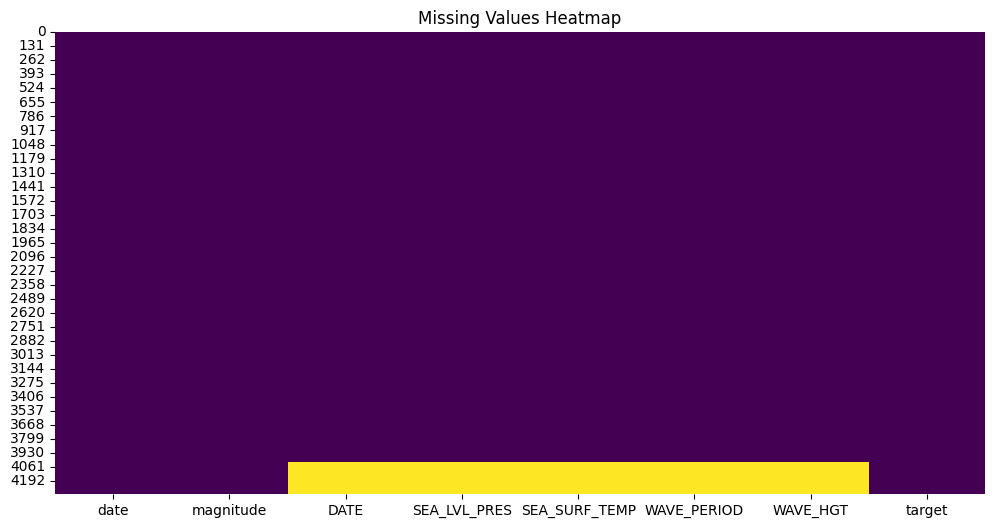

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# NaN 값 확인을 위한 히트맵 시각화
plt.figure(figsize=(12, 6))
sns.heatmap(merged_df.isna(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


In [ ]:
merged_df = merged_df.dropna(axis=0)

In [ ]:
def load_data(data, seq_len):
    X = []
    y = []

    for i in range(seq_len, len(data)):
        X.append(data.iloc[i - seq_len:i, 0:-1])
        y.append(data.iloc[i, -1])
    return X, y

In [ ]:
merged_df_X = merged_df[['magnitude', 'SEA_SURF_TEMP', 'WAVE_PERIOD', 'WAVE_HGT', 'target']]

seq_len = 30
X, y = load_data(merged_df_X, seq_len)

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
X = np.array(X)
original_shape = X.shape

X_reshaped = X.reshape(-1, original_shape[2])  # (samples * sequence_length, features)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_reshaped)

X = X_scaled.reshape(original_shape)  # (samples, sequence_length, features)


In [ ]:
num = int(len(merged_df_X) * 0.8)
num

3212

In [ ]:
X_train = X[:num]
y_train = y[:num]
X_test = X[num:]
y_test = y[num:]

import numpy as np

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)


In [ ]:
print('x_train.shape = ',X_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_test.shape = ', X_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (3212, 30, 4)
y_train.shape =  (3212,)
x_test.shape =  (774, 30, 4)
y_test.shape =  (774,)


In [ ]:
import tensorflow as tf
from keras.layers import Dense, Dropout, SimpleRNN, LSTM, Bidirectional
from keras.models import Sequential

model_lstm = Sequential()

model_lstm.add(LSTM(128, activation='tanh', input_shape=(X_train.shape[1], 4), return_sequences=True))
model_lstm.add(Dropout(0.2))

model_lstm.add(LSTM(64, activation='tanh', return_sequences=True))
model_lstm.add(Dropout(0.2))

model_lstm.add(LSTM(24, activation='tanh', return_sequences=False))
model_lstm.add(Dropout(0.2))

model_lstm.add(Dense(32, activation='relu'))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_34 (LSTM)                       │ (None, 30, 128)             │          68,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_62 (Dropout)                 │ (None, 30, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_35 (LSTM)                       │ (None, 30, 64)              │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_63 (Dropout)                 │ (None, 30, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_36 (LSTM)                       │ (None, 24)                  │           8,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_64 (Dropout)                 │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 32)                  │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_65 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 126,881 (495.63 KB)

 Trainable params: 126,881 (495.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Precision, Recall, AUC

model_lstm.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', Precision(), Recall(), AUC()]
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model_lstm.fit(
    X_train, y_train,
    epochs=20,
    batch_size=30,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)



Epoch 1/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 31s 221ms/step - accuracy: 0.7696 - auc_9: 0.5109 - loss: 0.5645 - precision_9: 0.7815 - recall_9: 0.9780 - val_accuracy: 0.7807 - val_auc_9: 0.5000 - val_loss: 0.5260 - val_precision_9: 0.7807 - val_recall_9: 1.0000
Epoch 2/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 208ms/step - accuracy: 0.7961 - auc_9: 0.4887 - loss: 0.5296 - precision_9: 0.7961 - recall_9: 1.0000 - val_accuracy: 0.7807 - val_auc_9: 0.5000 - val_loss: 0.5261 - val_precision_9: 0.7807 - val_recall_9: 1.0000
Epoch 3/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 205ms/step - accuracy: 0.7915 - auc_9: 0.4987 - loss: 0.5269 - precision_9: 0.7915 - recall_9: 1.0000 - val_accuracy: 0.7807 - val_auc_9: 0.5000 - val_loss: 0.5295 - val_precision_9: 0.7807 - val_recall_9: 1.0000
Epoch 4/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 208ms/step - accuracy: 0.7876 - auc_9: 0.4664 - loss: 0.5350 - precision_9: 0.7876 - recall_9: 1.0000 - val_accuracy: 0.7807 - val_auc_9: 0.5000 - val_loss: 0.5324 - val_precision_9: 0.7807 - v

In [ ]:
from sklearn.metrics import classification_report

y_pred_prob = model_lstm.predict(X_test)

threshold = 0.5
y_pred_classes = (y_pred_prob > threshold).astype(int)
print(classification_report(y_test, y_pred_classes))


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step
              precision    recall  f1-score   support

           0       0.32      0.77      0.45       245
           1       0.69      0.24      0.36       529

    accuracy                           0.41       774
   macro avg       0.51      0.50      0.40       774
weighted avg       0.57      0.41      0.39       774



In [ ]:
import numpy as np
from sklearn.metrics import classification_report

y_pred_prob = model_lstm.predict(X_test)

np.random.seed(42)
sample_indices = np.random.choice(len(X_test), 10, replace=False)

print("Randomly Selected Predicted Probabilities for Class 1 (지진 발생 가능성):")
for i in sample_indices:
    print(f"Sample {i+1}: {y_pred_prob[i][0]:.4f}")

threshold = 0.5
y_pred_classes = (y_pred_prob > threshold).astype(int)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
Randomly Selected Predicted Probabilities for Class 1 (지진 발생 가능성):
Sample 357: 0.5010
Sample 508: 0.5009
Sample 580: 0.4995
Sample 251: 0.4966
Sample 345: 0.4969
Sample 728: 0.4998
Sample 644: 0.4986
Sample 697: 0.5034
Sample 121: 0.4979
Sample 518: 0.4986

Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.77      0.45       245
           1       0.69      0.24      0.36       529

    accuracy                           0.41       774
   macro avg       0.51      0.50      0.40       774
weighted avg       0.57      0.41      0.39       774



In [ ]:
# import tensorflow as tf
# from tensorflow.keras.layers import Dense, Dropout, LSTM, Bidirectional, LayerNormalization, MultiHeadAttention, Add, Input
# from tensorflow.keras.models import Model
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.metrics import Precision, Recall, AUC
# import numpy as np

# # Transformer Encoder Layer 정의
# class TransformerEncoderLayer(tf.keras.layers.Layer):
#     def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
#         super(TransformerEncoderLayer, self).__init__()
#         self.att = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
#         self.ffn = Sequential([
#             Dense(ff_dim, activation="relu"),
#             Dense(embed_dim),
#         ])
#         self.layernorm1 = LayerNormalization(epsilon=1e-6)
#         self.layernorm2 = LayerNormalization(epsilon=1e-6)
#         self.dropout1 = Dropout(rate)
#         self.dropout2 = Dropout(rate)

#     def call(self, inputs, training=False):  # training 인자를 기본값 False로 설정
#         attn_output = self.att(inputs, inputs)
#         attn_output = self.dropout1(attn_output, training=training)
#         out1 = self.layernorm1(inputs + attn_output)
#         ffn_output = self.ffn(out1)
#         ffn_output = self.dropout2(ffn_output, training=training)
#         return self.layernorm2(out1 + ffn_output)

# # 모델 빌드 함수 정의
# def build_hybrid_model(seq_len, feature_size, embed_dim=64, num_heads=4, ff_dim=128, lstm_units=[64, 32]):
#     inputs = Input(shape=(seq_len, feature_size))

#     # 입력 차원 맞추기
#     x = Dense(embed_dim)(inputs)  # feature_size -> embed_dim 변환

#     # Transformer Encoder Layer 추가
#     x = TransformerEncoderLayer(embed_dim, num_heads, ff_dim)(x)

#     # LSTM 레이어 추가
#     for units in lstm_units:
#         x = Bidirectional(LSTM(units, activation='tanh', return_sequences=True))(x)
#         x = Dropout(0.3)(x)

#     # 최종 LSTM 레이어
#     x = LSTM(32, activation='tanh', return_sequences=False)(x)
#     x = Dropout(0.3)(x)

#     # Dense 레이어
#     x = Dense(64, activation='relu')(x)
#     x = Dropout(0.2)(x)
#     x = Dense(32, activation='relu')(x)
#     x = Dropout(0.2)(x)

#     # 출력 레이어
#     outputs = Dense(1, activation='sigmoid')(x)

#     model = Model(inputs=inputs, outputs=outputs)
#     return model

# # 모델 인스턴스 생성
# model_hybrid = build_hybrid_model(seq_len=X_train.shape[1], feature_size=X_train.shape[2])

# # 모델 컴파일
# model_hybrid.compile(
#     optimizer=Adam(learning_rate=0.001),
#     loss='binary_crossentropy',
#     metrics=['accuracy', Precision(), Recall(), AUC()]
# )

# # EarlyStopping 콜백 설정
# early_stopping = EarlyStopping(
#     monitor='val_loss',
#     patience=5,
#     restore_best_weights=True
# )

# # 모델 훈련
# history = model_hybrid.fit(
#     X_train, y_train,
#     epochs=20,
#     batch_size=30,
#     validation_split=0.2,
#     callbacks=[early_stopping],
#     verbose=1
# )

# # 모델 요약 출력
# model_hybrid.summary()


Epoch 1/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 26s 134ms/step - accuracy: 0.6777 - auc_8: 0.4837 - loss: 0.6041 - precision_8: 0.8020 - recall_8: 0.8107 - val_accuracy: 0.7807 - val_auc_8: 0.5004 - val_loss: 0.5312 - val_precision_8: 0.7807 - val_recall_8: 1.0000
Epoch 2/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 125ms/step - accuracy: 0.7954 - auc_8: 0.4958 - loss: 0.5223 - precision_8: 0.7954 - recall_8: 1.0000 - val_accuracy: 0.7807 - val_auc_8: 0.5090 - val_loss: 0.5268 - val_precision_8: 0.7807 - val_recall_8: 1.0000
Epoch 3/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 123ms/step - accuracy: 0.7886 - auc_8: 0.5160 - loss: 0.5257 - precision_8: 0.7886 - recall_8: 1.0000 - val_accuracy: 0.7807 - val_auc_8: 0.5069 - val_loss: 0.5291 - val_precision_8: 0.7807 - val_recall_8: 1.0000
Epoch 4/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 126ms/step - accuracy: 0.7927 - auc_8: 0.5175 - loss: 0.5190 - precision_8: 0.7927 - recall_8: 1.0000 - val_accuracy: 0.7807 - val_auc_8: 0.5552 - val_loss: 0.5254 - val_precision_8: 0.7807 - v

Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)          │ (None, 30, 4)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 30, 64)              │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ transformer_encoder_layer_3          │ (None, 30, 64)              │          83,200 │
│ (TransformerEncoderLayer)            │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_7 (Bidirectional)      │ (None, 30, 128)             │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_49 (Dropout)                 │ (None, 30, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_8 (Bidirectional)      │ (None, 30, 64)              │          41,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_50 (Dropout)                 │ (None, 30, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_28 (LSTM)                       │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_51 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_52 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_53 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 622,277 (2.37 MB)

 Trainable params: 207,425 (810.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 414,852 (1.58 MB)